In [1]:
%matplotlib inline
import warnings
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn import set_config
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
set_config(display='diagram') # Để trực quan hóa pipeline


In [2]:
data_df = pd.read_csv('train.csv')
data_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,24,male,23.655,0,no,northwest,2352.96845
1,28,female,26.510,2,no,southeast,4340.44090
2,51,male,39.700,1,no,southwest,9391.34600
3,47,male,36.080,1,yes,southeast,42211.13820
4,46,female,28.900,2,no,southwest,8823.27900
5,63,female,26.220,0,no,northwest,14256.19280
6,38,female,19.950,2,no,northeast,7133.90250
7,28,female,26.315,3,no,northwest,5312.16985
8,25,male,26.800,3,no,southwest,3906.12700
9,18,female,30.115,0,no,northeast,2203.47185


# Kiểu dữ liệu của các thuộc tính

In [3]:
data_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Cái nhìn tổng quan về dữ liệu

### Số lượng các giá trị của thuộc tính age

<AxesSubplot:xlabel='age', ylabel='Count'>

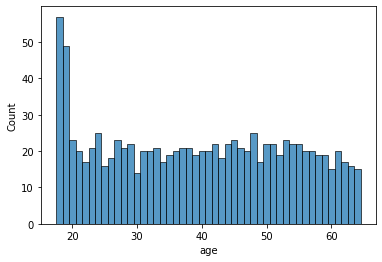

In [4]:
sns.histplot(data=data_df, x="age", binwidth=3,discrete = True)


### Số lượng các giá trị của thuộc tính sex

<AxesSubplot:xlabel='sex', ylabel='Count'>

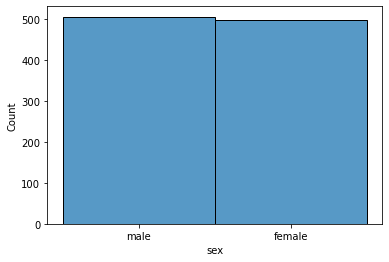

In [5]:
sns.histplot(data=data_df, x="sex", binwidth=3)


### Số lượng các giá trị của thuộc tính children

<AxesSubplot:xlabel='children', ylabel='Count'>

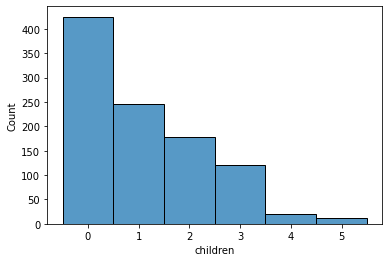

In [6]:
sns.histplot(data=data_df, x="children", binwidth=3,discrete = True)


### Số lượng các giá trị của thuộc tính smoker

<AxesSubplot:xlabel='smoker', ylabel='Count'>

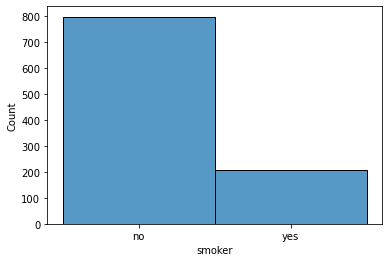

In [7]:
sns.histplot(data=data_df, x="smoker", binwidth=3,discrete = True)


### Số lượng các giá trị của thuộc tính region

<AxesSubplot:xlabel='region', ylabel='Count'>

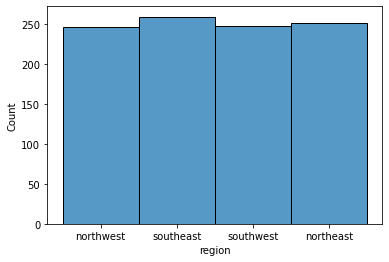

In [8]:
sns.histplot(data=data_df, x="region", binwidth=3,discrete = True)


### Plot line của bmi theo charges

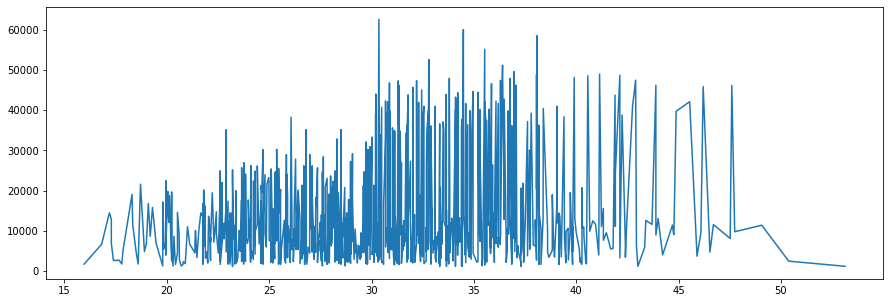

In [9]:
plt.figure(figsize=(15,5))
data_df.sort_values('bmi',inplace=True)
plt.plot(data_df['bmi'],data_df['charges'])

In [10]:
data_df.describe()

,age,bmi,children,charges
count,1003.000000,1003.000000,1003.000000,1003.000000
mean,39.255234,30.511780,1.104686,13267.935817
std,14.039105,6.013107,1.204619,12051.356547
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.210000,0.000000,4780.839400
50%,39.000000,30.200000,1.000000,9447.382400
75%,51.000000,34.430000,2.000000,16840.667970
max,64.000000,53.130000,5.000000,62592.873090


In [11]:
data_df.isna().sum()   #missing

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Trình bày các thông tin hữu ích (insights) tác động đến chi phí y tế cá nhân.

### Vùng miền có ảnh hưởng như thế nào đến chi phí y tế cá nhân?

In [12]:
data_df.groupby('region')['charges'].sum().sort_values()

region
northwest    3.108129e+06
southwest    3.124289e+06
northeast    3.358865e+06
southeast    3.716457e+06
Name: charges, dtype: float64

<AxesSubplot:ylabel='region'>

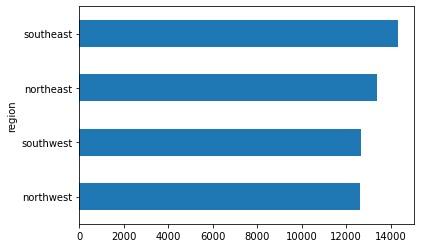

In [13]:
data_df.groupby('region')['charges'].mean().sort_values().plot.barh()

- **Nhận xét:** sự chênh lệch về chi phí y tế đối với thuộc tính **region** không đáng kể.
    - Chi phí y tế cá nhân xếp theo thứ tự: **southeast > northeast > southwest > northwest**
    - Tổng chi phí y tế cá nhân theo vùng miền không chênh lệch nhau quá 3000
- **Dự đoán:** thuộc tính **region** không ảnh hưởng quá lớn đến chi phí y tế.

### Chi phí y tế mà những người hút thuốc phải trả so với những người không hút thuốc có chênh lệch không?

In [14]:
data_df.groupby('smoker')['charges'].mean().sort_values() 

smoker
no      8479.212525
yes    31795.180787
Name: charges, dtype: float64

<AxesSubplot:ylabel='smoker'>

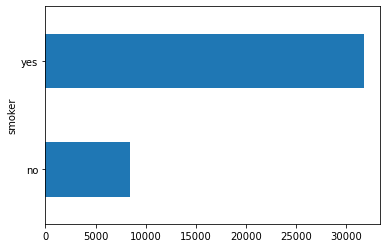

In [15]:
data_df.groupby('smoker')['charges'].mean().sort_values().plot.barh()

- **Nhận xét:** người hút thuốc phải chi trả nhiều chi phí y tế hơn người không hút thuốc, cụ thể gấp 4 lần.
- **Dự đoán:** thuộc tính **smoker** có thể ảnh hưởng lớn đến chi phí y tế.
    - Khi dùng mô hình học máy ta có thể thay **yes = 4**,**no = 1**.

### Yêú tố độ tuổi có ảnh hưởng đến chi phí y tế cá nhân hay không?

In [16]:
data_df.groupby('age')['charges'].mean().sort_values()

age
21     4855.158054
38     6766.606769
32     6823.242158
26     7040.689766
18     7692.687396
28     8523.357818
31     8712.611502
19     8880.935206
29     9230.206968
34     9543.373808
24    10207.033180
40    10297.986615
41    10607.201607
36    10627.911135
27    11638.657443
20    11650.401476
42    12065.855973
25    12139.769111
33    12167.674182
22    12444.775394
35    13057.678123
39    13448.393320
23    13921.033705
49    13987.237876
58    14320.800007
46    14565.792160
53    14593.677610
44    14719.588889
48    15051.765006
52    15277.466186
50    15503.110372
57    15759.373817
56    16066.634888
30    16152.096109
45    16464.278286
55    16704.936363
47    16780.868203
37    17210.998954
63    17225.512787
51    17519.379511
43    17945.173158
54    18338.395498
62    20263.591499
59    20864.160115
61    22603.829793
60    23255.360771
64    23391.461341
Name: charges, dtype: float64

<AxesSubplot:xlabel='age'>

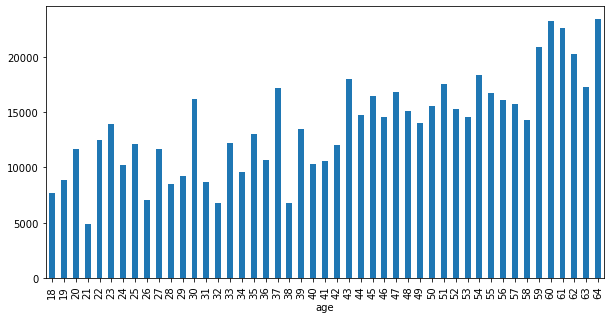

In [17]:
plt.figure(figsize=(10,5))

data_df.groupby('age')['charges'].mean().plot.bar()

- **Nhận xét:** nhìn tổng thể ta sẽ thấy rằng độ tuổi càng cao thì việc chi trả y tế  cá nhân cũng càng cao.
- **Dự đoán:** những người ở độ tuổi cao(>=43) sẽ trả nhiều chi phí y tế hơn, do độ tuổi cao sức khỏe khém.

### Yêú tố giới tính có ảnh hưởng đến chi phí y tế cá nhân hay không?

In [18]:
data_df.groupby('sex')['charges'].mean()

sex
female    12741.030880
male      13785.468928
Name: charges, dtype: float64

<AxesSubplot:ylabel='sex'>

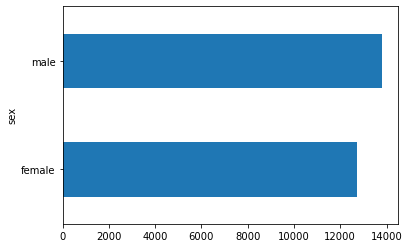

In [19]:
data_df.groupby('sex')['charges'].mean().plot.barh()

- **Nhận xét:** sự chênh lệnh về chi phí y tế theo giới tính không cao, chêch lệnh khoảng 1000
- **Dự đoán:** thuộc tính **sex** không ảnh hưởng quá lớn đến chi phí y tế.

### Yêú tố số lượng trẻ con/người phụ thuộc có ảnh hưởng đến chi phí y tế cá nhân hay không?

In [20]:
data_df.groupby('children')['charges'].mean()

children
0    12151.780720
1    12952.327303
2    15086.862511
3    15486.041388
4    13846.733476
5     8942.128604
Name: charges, dtype: float64

<AxesSubplot:xlabel='children'>

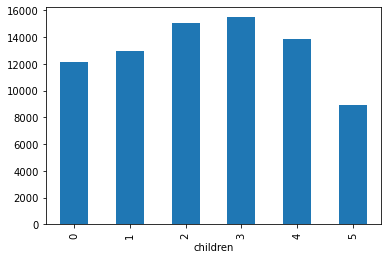

In [21]:
data_df.groupby('children')['charges'].mean().plot.bar()

- **Nhận xét:**
    - Nhìn chung có sự chênh lệch về chi phí y tế cá nhân dựa trên thuộc tính **children**
    - Cao nhất: **3 children/người phụ thuộc**, thấp nhất: **5 children/ người phụ thuộc**.
    - Tỉ lệ chi phí y tế theo thuộc tính trẻ con/người phụ thuộc cao nhất và thấp nhất gần 2 lần.
    
- **Dự đoán:** thuộc tính trên có thể ảnh hưởng đến việc dự đoán chi phí y tế cá nhân.
    - Khi dùng các mô hình học máy ta có thể  thay đổi các giá trị này **[0,1,2,3,4,5] = [2,3,5,6,4,1]**

### Chỉ số BMI có ảnh hưởng đến chi phí y tế cá nhân như thế nào?

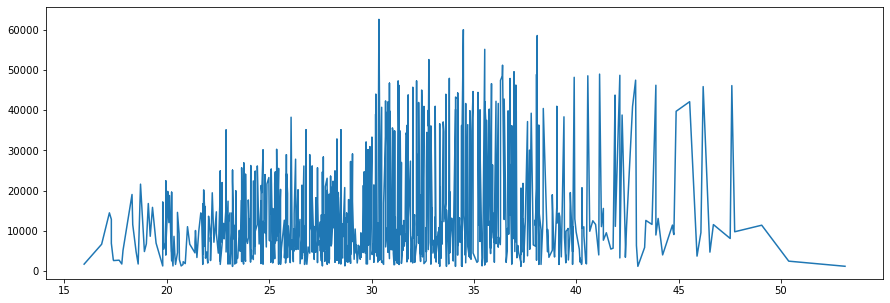

In [22]:
plt.figure(figsize=(15,5))
data_df.sort_values('bmi',inplace=True)
plt.plot(data_df['bmi'],data_df['charges'])

- **Nhận xét:** ta nhận thấy người có chỉ số BMI lớn hơn 30 sẽ chi trả chi phí y tế cá nhân nhiều hơn.
- **Dự đoán:** khó dự đoán được thuộc tính **BMI** có ảnh hưởng hay không khi nhìn vào đồ thị.

# CÁC MÔ HÌNH MÁY HỌC CƠ BẢN

## Linear Regession

#### Tách tập dữ liệu

In [4]:
# Tách X và y
y_sr = data_df["charges"] # sr là viết tắt của series
X_df = data_df.drop("charges", axis=1)

In [5]:
# Chia tập dữ liệu, train:70%, validation: 30%
train_X, test_X, train_y, test_y = train_test_split(X_df,y_sr,test_size=0.3, random_state=0)

In [11]:
# Hàm tính độ lỗi MSE
def compute_mse(y, preds):
    return ((y - preds) ** 2).mean()
def compute_rr(y, preds, baseline_preds):
    return 1 - compute_mse(y, preds) / compute_mse(y, baseline_preds)


#### Onehot với các thuộc tính dạng cata, scalar dữ liệu, make pipeline

In [9]:
unorder_cate_cols = ['sex','region','smoker']

mode_unordercols = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

col_transform = ColumnTransformer([('unorder_cate_cols', mode_unordercols,unorder_cate_cols)],remainder='passthrough')

linear_regression_model = LinearRegression()

preprocess_pipeline = make_pipeline(col_transform, StandardScaler(), linear_regression_model)

preprocessed_train_X = preprocess_pipeline.fit(train_X,train_y)

preprocessed_train_X

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('unorder_cate_cols',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'region',
                                                   'smoker'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

### Đánh giá mô hình Linear Regession
- **Độ lỗi của mô hình trên tập validation: 0.24508920431879022**
- **Độ chính xác của mô hình trên tập validation: 0.7549107956812098**

In [12]:
baseline_preds = train_y.mean()
print('Độ lỗi của mô hình trên tập validation(measure: R^2:)',1 - compute_rr(test_y, preprocessed_train_X.predict(test_X), baseline_preds))
print('Độ chính xác của mô hình trên tập validation(measure: R^2:)', compute_rr(test_y, preprocessed_train_X.predict(test_X), baseline_preds))

Độ lỗi của mô hình trên tập validation(measure: R^2:) 0.24508920431879022
Độ chính xác của mô hình trên tập validation(measure: R^2:) 0.7549107956812098


# CÁC MÔ HÌNH MÁY HỌC NGOÀI (NÂNG CAO)  

-  BÂY GIỜ TA THỰC HIỆN CÁC BƯỚC TIÈN XỬ LÝ ĐÊN MÔ HÌNH HÓA.
-  DO ĐẦY LÀ **BÀI TOÁN HỒI QUY** NÊN CÁC MÔ HÌNH MÁY HỌC ĐƯỢC XÉT:
    - `RandomForestRegressor`
    - `MLPRegressor`

## - Phần 1: Tiền xử lý (tách các tập)

### Bây giờ ta sẽ thực hiện bước tiền xử lý là tách tập train và tập validation ra theo tỉ lệ: 70%:30%.¶


- Tách thành 2 phần X và y. Với X là input, y là output, với y là `charges`

In [14]:
# Tách X và y
y_sr = data_df["charges"] # sr là viết tắt của series
X_df = data_df.drop("charges", axis=1)

- Chia thành 2 bộ dữ liệu train và validation

In [15]:
train_X, test_X, train_y, test_y = train_test_split(X_df,y_sr,test_size=0.3, random_state=0)

- Kích thước dữ liệu sau khi tách

In [16]:
print("shape train_X :", train_X.shape)
print("shape train_y :", train_y.shape)
print("shape val_X :", test_X.shape)
print("shape val_y :", test_y.shape)

shape train_X : (702, 6)
shape train_y : (702,)
shape val_X : (301, 6)
shape val_y : (301,)


## - Phần 2: Khám phá dữ liệu (Tập huấn luyện)

### Mỗi cột input hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [17]:
train_X.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

- Nhận xét về tập dữ liệu
    - Dữ liệu có 6 thuộc tính.
    - Các thuộc tính có kiểu dữ liệu có vẻ phù hợp.

## - Phần 3: Tiền xử lý (tập huấn luyện)

Ta tiến hành tiền xử lý như sau: 
- Như đã phân tích các nhân tố của từng thuộc tính ảnh hưởng đến mức độ chi phí, do đó ta sẽ sắp xếp và chuyển đổi các nhân tố  của từng thuộc tính đó theo thứ tự dạng numeric, tùy theo độ mức độ ảnh hưởng.
- Ở đây, ví dụ: Với thuộc tính `smoker`, sau khi phân tích ở trên, ta có thể nhận thấy chi phí trung bình của người có hút thuốc cao gấp 4 lần so với người không hút thuốc nên chuyển `yes` sang 4 và `no` sang 1. Tương tự cho các thuộc tính khác, sẽ được chuyển đổi sao cho phù hợp.

In [18]:
def convert_col_dtype(col):
    if col.name == 'smoker':
        col.replace('yes',4, inplace = True)
        col.replace('no',1, inplace = True)
 #   if col.name == 'region':
 #       col.replace('northwest',1, inplace = True)
 #       col.replace('southwest',2, inplace = True)
 #       col.replace('northeast',3, inplace = True)
 #       col.replace('southeast',4, inplace = True)
 #   if col.name == 'sex':
 #       col.replace('male',2, inplace = True)
 #       col.replace('female',1, inplace = True)
    if col.name == 'children':
        col.replace(3,6, inplace = True)
        col.replace(2,5, inplace = True)
        col.replace(4,4, inplace = True)
        col.replace(1,3, inplace = True)
        col.replace(0,2, inplace = True)
        col.replace(5,1, inplace = True)
    return col

- Class `ColAdderDropper` ở dưới đây sẽ thực hiện các bước ở trên.
- Ngoài ra, class `ColAdderDropper` được kế thừa từ 2 class của Sklearn là `BaseEstimator` và `TransformerMixin`. Việc kế thừa này giúp class của ta tự động có các phương thức như `set_params`, `get_params`, `fit_transform` 

In [19]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X_df, y=None):
        return self
    def transform(self, X_df, y=None):
        _df = X_df.copy()
        _df = _df.apply(convert_col_dtype)
        return _df
    
col_adderdropper = ColAdderDropper()
fewer_cols_train_X_df = col_adderdropper.fit_transform(data_df)
fewer_cols_train_X_df

,age,sex,bmi,children,smoker,region,charges
0,24,male,23.655,2,1,northwest,2352.96845
1,28,female,26.510,1,1,southeast,4340.44090
2,51,male,39.700,3,1,southwest,9391.34600
3,47,male,36.080,3,4,southeast,42211.13820
4,46,female,28.900,1,1,southwest,8823.27900
...,...,...,...,...,...,...,...
998,18,female,31.350,4,1,northeast,4561.18850
999,39,female,23.870,1,1,southeast,8582.30230
1000,58,male,25.175,2,1,northeast,11931.12525
1001,37,female,47.600,1,4,southwest,46113.51100


In [20]:
fewer_cols_train_X_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

- Có vẽ như kiểu dữ liệu các cột khá lý tưởng.

### Các bước tiền xử lý tiếp theo như sau:

Bây giờ ta chuyển tất cả các cột về dạng số như sau:
- Do các cột không chứa các giá trị thiếu nên ta không cần điền giá trị thiếu vào.
- Với các cột dạng số, ta giữ nguyên.
- Các cột không phải dạng số  và không có thứ tự, ta sẽ mã hóa bằng `one-hot`.

Tiến hành chuẩn hóa.

Cuối cùng tạo một pipeline sử dụng các thao tác trên cùng lúc.


In [21]:
unorder_cate_cols = ['sex','region']

mode_unordercols = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

col_transform = ColumnTransformer([('unorder_cate_cols', mode_unordercols,unorder_cate_cols)],remainder='passthrough')

preprocess_pipeline = make_pipeline(col_adderdropper,col_transform,StandardScaler())
preprocessed_train_X = preprocess_pipeline.fit_transform(data_df)
preprocessed_train_X

array([[-0.99106682,  0.99106682, -0.57773402, ..., -0.39671642,
        -0.50839872, -0.9061563 ],
       [ 1.0090137 , -1.0090137 , -0.57773402, ..., -1.0863292 ,
        -0.50839872, -0.74115711],
       [-0.99106682,  0.99106682, -0.57773402, ...,  0.29289635,
        -0.50839872, -0.32183296],
       ...,
       [-0.99106682,  0.99106682,  1.73090033, ..., -0.39671642,
        -0.50839872, -0.11098149],
       [ 1.0090137 , -1.0090137 , -0.57773402, ..., -1.0863292 ,
         1.9669601 ,  2.72682672],
       [-0.99106682,  0.99106682, -0.57773402, ..., -0.39671642,
        -0.50839872, -0.25348375]])

# - Phần 4: Tiền xử lý + `mô hình hóa`

#### Tìm mô hình tốt nhất cho độ lỗi trên tập validation nhỏ nhất

Sử dụng độ do R-Squared cho mô hình hồi quy.

In [22]:
# Tính độ đo r^2 trên tập huấn luyện
def compute_mse(y, preds):
    return ((y - preds) ** 2).mean()
def compute_rr(y, preds, baseline_preds):
    return 1 - compute_mse(y, preds) / compute_mse(y, baseline_preds)
baseline_preds = train_y.mean()

### 1. Mô hình `MLPRegressor`

Ta sẽ sử dụng mô hình Neural Net để phân lớp. Bạn sẽ tạo ra một pipeline từ đầu đến cuối bao gồm: các bước tiền xử lý ở trên + Neural Net (với các siêu tham số  `activation='logistic', solver='lbfgs', random_state=0, max_iter=2500`).

- Siêu tham số alpha với 5 giá trị khác nhau.
- Tham số hidden_layer_sizes với 6 giá trị khác nhau.

Tìm các giá trị best_alpha, best_hidden_layer.

In [23]:
warnings.filterwarnings("ignore")
neural_net_model = MLPRegressor(activation='logistic', solver='lbfgs', random_state=0, max_iter=2500)
full_pipeline = make_pipeline(col_adderdropper,col_transform, StandardScaler(), neural_net_model)

# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất
train_errs = []
val_errs = []
alphas = [1, 10, 100,500,800]
hidden_layer_sizes=[80,100,120,130,140,150]
best_val_err = float('inf'); best_alpha = None; best_hidden_layer=None;
for hidden_layer in hidden_layer_sizes:
    for alpha in alphas:
        full_pipeline.set_params(mlpregressor__alpha=alpha, mlpregressor__hidden_layer_sizes=hidden_layer)
        full_pipeline.fit(train_X, train_y)
        train_errs.append(100 - compute_rr(train_y, full_pipeline.predict(train_X), baseline_preds) * 100)
        val_errs.append(100 - compute_rr(test_y, full_pipeline.predict(test_X), baseline_preds) * 100)

        if val_errs[-1] < best_val_err:
            best_val_err = val_errs[-1]
            best_alpha = alpha
            best_hidden_layer=hidden_layer
            
'Finish!'

'Finish!'

### Trực quan hóa kết quả độ lỗi theo các tham số khác nhau trên tập train và tập validation

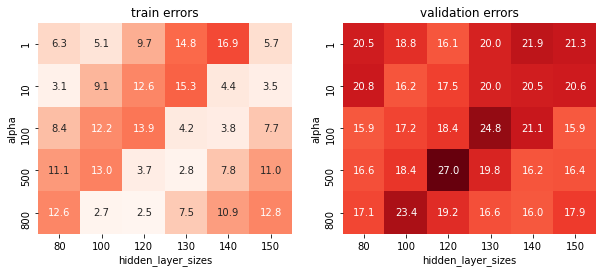

In [24]:

train_errs_df = pd.DataFrame(data=np.array(train_errs).reshape(len(alphas), -1),
                             index=alphas, columns=hidden_layer_sizes)
val_errs_df = pd.DataFrame(data=np.array(val_errs).reshape(len(alphas), -1), 
                           index=alphas, columns=hidden_layer_sizes)
min_err = min(min(train_errs), min(val_errs))
max_err = max(max(train_errs), max(val_errs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('train errors'); plt.xlabel('hidden_layer_sizes'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('validation errors'); plt.xlabel('hidden_layer_sizes'); plt.ylabel('alpha');

#### In các giá trị tốt nhất vừa tìm được

In [25]:
print("best_val_err : ", best_val_err)
print("best_alpha : " ,best_alpha)
print("best_hidden_layer",best_hidden_layer)

best_val_err :  15.88929417304908
best_alpha :  100
best_hidden_layer 130


- Qua mô hình MLPRegresor ta có độ lỗi trên tập validation nhỏ nhất là 15.88%

### 2. Mô hình `RandomforestRegressor`

- Tham số: random_state=0
- Siêu tham số max_depth với 5 giá trị khác nhau.
- Tham số n_estimators với 5 giá trị khác nhau.

Tìm các giá trị best_max_depth, best_n_estimators.

In [26]:
warnings.filterwarnings("ignore")
RandomForest_model = RandomForestRegressor(random_state=0)
full_pipeline = make_pipeline(col_adderdropper, col_transform, StandardScaler(), RandomForest_model)

# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất
train_errs = []
val_errs = []
max_depth = [16, 32, 64, 128, 256]
n_estimators=[20,50,80,100,120,130]
best_val_err = float('inf'); best_max_depth = None; best_n_estimators=None;
for depth in max_depth:
    for estimators in n_estimators:
        full_pipeline.set_params(randomforestregressor__max_depth = depth, randomforestregressor__n_estimators = estimators)
        full_pipeline.fit(train_X, train_y)
        train_errs.append(100 - compute_rr(train_y, full_pipeline.predict(train_X), baseline_preds) * 100)
        val_errs.append(100 - compute_rr(test_y, full_pipeline.predict(test_X), baseline_preds) * 100)

        if val_errs[-1] < best_val_err:
            best_val_err = val_errs[-1]
            best_max_depth = depth
            best_n_estimators = estimators
            
'Finish!'

'Finish!'

### Trực quan hóa kết quả độ lỗi theo các tham số khác nhau trên tập train và tập validation

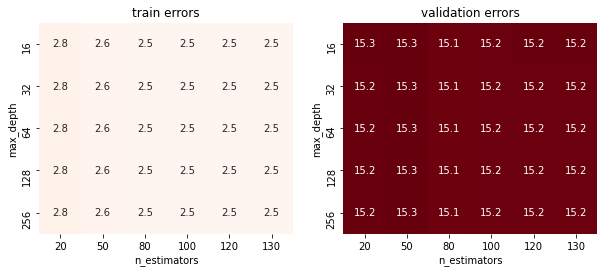

In [27]:
train_errs_df = pd.DataFrame(data=np.array(train_errs).reshape(len(alphas), -1),
                             index=max_depth, columns=n_estimators)
val_errs_df = pd.DataFrame(data=np.array(val_errs).reshape(len(alphas), -1), 
                           index=max_depth, columns=n_estimators)
min_err = min(min(train_errs), min(val_errs))
max_err = max(max(train_errs), max(val_errs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('train errors'); plt.xlabel('n_estimators'); plt.ylabel('max_depth')
plt.subplot(1, 2, 2)
sns.heatmap(val_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('validation errors'); plt.xlabel('n_estimators'); plt.ylabel('max_depth');

#### In các giá trị tốt nhất vừa tìm được

In [28]:
print("best_val_err : ", best_val_err)
print("best_alpha : " ,best_max_depth)
print("best_hidden_layer",best_n_estimators)

best_val_err :  15.116219181481853
best_alpha :  32
best_hidden_layer 80


- Qua mô hình RandomForestRegressor ta có độ lỗi trên tập validation nhỏ nhất là 15.11%

### Đánh giá độ lỗi và chọn mô hình phù hợp.


- Cả mô hình `RandomForestRegressor` và `MLPRegression` cho kết quả khả quan trên tập validation, tuy nhiên kết quả vẫn còn khá chủ quan vì việc lựa chọn các siêu tham số đều được làm bằng tay.
- Cả 2 mô hình đều chạy khá ổn, tuy nhiên chọn mô hình `randomforestregression` vì kết quả độ lỗi có vẻ tốt hơn.

#### Train lại bằng mô hình `RandomForestRegressor` với các siêu tham số tối ưu tìm được trên tập train + validation.

In [29]:
warnings.filterwarnings("ignore")
full_train_X_df = train_X.append(test_X)
full_train_y_sr = train_y.append(test_y)

full_pipeline.set_params(randomforestregressor__max_depth = best_max_depth, randomforestregressor__n_estimators = best_n_estimators)
full_pipeline.fit(full_train_X_df, full_train_y_sr)

Pipeline(steps=[('coladderdropper', ColAdderDropper()),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('unorder_cate_cols',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'region'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=32, n_estimators=80,
                                       random_state=0))])

### So sánh kết quả predict với kết quả thực trên tập validation

In [30]:
preds = full_pipeline.predict(test_X).round(5)
# So sánh kết quả predict với kết quả actual
preds_df = pd.DataFrame(preds, index=test_y.index).rename(columns={0: 'Predict'})
preds_df = preds_df.assign(Actual = test_y)
preds_df.sample(15)

,Predict,Actual
863,10614.96669,9447.38240
167,2829.71400,1826.84300
416,19239.95562,19199.94400
435,10711.74306,10577.08700
240,11898.01350,10338.93160
824,42229.84478,41661.60200
740,2487.80847,1909.52745
162,17500.26792,14235.07200
30,5403.37568,5478.03680
762,17649.55614,20167.33603


## - Phần 5: Tính độ chính xác trên tập test với mô hình `RandomForestRegressor`

In [31]:
test_df = pd.read_csv('test.csv')
y_sr_test = test_df["charges"] # sr là viết tắt của series
X_df_test = test_df.drop("charges", axis=1)

In [36]:
print("Độ chính xác: ")
compute_rr(y_sr_test, full_pipeline.predict(X_df_test), baseline_preds) * 100

Độ chính xác: 


85.03163260852679

## Vậy qua các mô hình trên, ta tìm được mô hình tốt nhất cho việc huấn luyện cũng như dự đoán. Với mô hình `RandomForestRegressor` cho ra dự đoán với độ chính xác lên đến 85% (khá cao).